<a href="https://colab.research.google.com/github/rahuldave/StartingWithPython-ai1-fall2019/blob/master/mnist_keras_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing

In [0]:
!pip install wandb

     |████████████████████████████████| 1.3MB 6.3MB/s 
     |████████████████████████████████| 92kB 27.1MB/s 
     |████████████████████████████████| 235kB 50.8MB/s 
     |████████████████████████████████| 460kB 38.6MB/s 
     |████████████████████████████████| 92kB 24.5MB/s 
     |████████████████████████████████| 102kB 26.3MB/s 
     |████████████████████████████████| 71kB 24.3MB/s 
     |████████████████████████████████| 256kB 28.3MB/s 
     |████████████████████████████████| 184kB 43.4MB/s 
  Created wheel for shortuuid: filename=shortuuid-0.5.0-cp36-none-any.whl size=5499 sha256=e0dbe5bd3735741cd1596fb013b81a899ea2d0815163f4969348d6d93f3dc0e5
  Stored in directory: /root/.cache/pip/wheels/3f/eb/fd/69e5177f67b505e44acbd1aedfbe44b91768ee0c4cd5636576
  Created wheel for watchdog: filename=watchdog-0.9.0-cp36-none-any.whl size=73652 sha256=bd03736ba2232c035ac38c2aff921f16ea3ef563e65798692fd5a8927faffd4d
  Stored in directory: /root/.cache/pip/wheels/61/1d/d0/04cfe495619be2095eb8d89a31

In [0]:
# from lukas/mlclass
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.utils import np_utils
from wandb.keras import WandbCallback
import wandb
import os



Using TensorFlow backend.


In [0]:
run = wandb.init()

<IPython.core.display.Javascript object>

wandb: ERROR Not authenticated.  Copy a key from https://app.wandb.ai/authorize


API Key: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


## Config

In [0]:
# 
config = run.config
# class Config:
#   pass
# config = Config()
config.first_layer_convs = 32
config.first_layer_conv_width = 3
config.first_layer_conv_height = 3
config.dropout = 0.2
config.dense_layer_size = 100
config.img_width = 28
config.img_height = 28
config.epochs = 10

## Setup

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32')
X_train /= 255.
X_test = X_test.astype('float32')
X_test /= 255.



In [0]:
X_train.shape, y_test.shape

((60000, 28, 28), (10000,))

In [0]:
# reshape input data
X_train = X_train.reshape(
    X_train.shape[0], config.img_width, config.img_height, 1)
X_test = X_test.reshape(
    X_test.shape[0], config.img_width, config.img_height, 1)

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(y_train.shape)
num_classes = y_test.shape[1]
labels = range(10)

(60000, 10)


## Model Building

In [0]:
# build model
model = Sequential()
model.add(Conv2D(32,
                 (config.first_layer_conv_width, config.first_layer_conv_height),
                 input_shape=(28, 28, 1),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.4))
model.add(Conv2D(64,
                 (3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(config.dense_layer_size, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
model.summary()




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)            

In [0]:
%%wandb
## Model Running
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=config.epochs,
          callbacks=[WandbCallback(data_type="image", save_model=False)])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 302us/step - loss: 0.1821 - acc: 0.9429 - val_loss: 0.0422 - val_acc: 0.9855
Epoch 2/10
60000/60000 [==============================] - 16s 272us/step - loss: 0.0687 - acc: 0.9791 - val_loss: 0.0306 - val_acc: 0.9885
Epoch 3/10
60000/60000 [==============================] - 16s 269us/step - loss: 0.0544 - acc: 0.9832 - val_loss: 0.0276 - val_acc: 0.9911
Epoch 4/10
60000/60000 [==============================] - 16s 268us/step - loss: 0.0466 - acc: 0.9858 - val_loss: 0.0246 - val_acc: 0.9918
Epoch 5/10
60000/60000 [==============================] - 16s 268us/step - loss: 0.0374 - acc: 0.9882 - val_loss: 0.0284 - val_acc: 0.9911
Epoch 6/10
60000/60000 [==============================] - 16s 264us/step - loss: 0.0332 - acc: 0.9892 - val_loss: 0.0278 - val_acc: 0.9908
Epoch 7/10
60000/60000

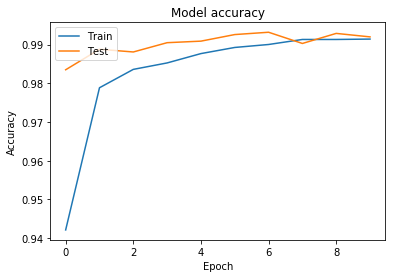

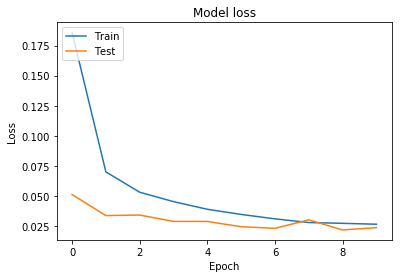

In [0]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()